In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV


import statsmodels.api as sm




### Basisinformationen

In [2]:
df = pd.read_csv("candy-data.csv", index_col=0)
print(df.info())
print(df.describe())
df.sort_values(by='winpercent', ascending=False, inplace=True)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB
None
       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.1647

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050


### Verteilung von numerische Variablen


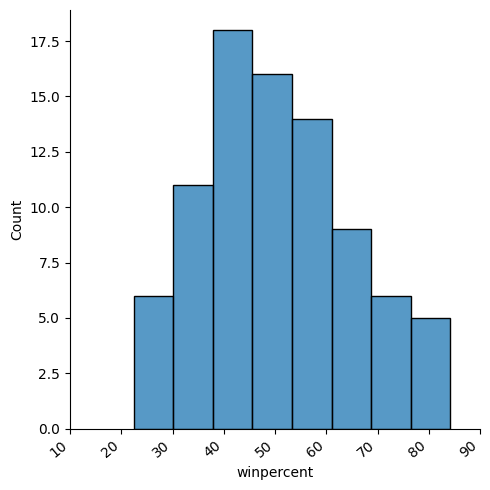

In [3]:
def dist_numerische_variable(df, variable):
     
    ax = sns.displot(df, x=variable)
    ax.set_xticklabels( rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

dist_numerische_variable(df, 'winpercent')

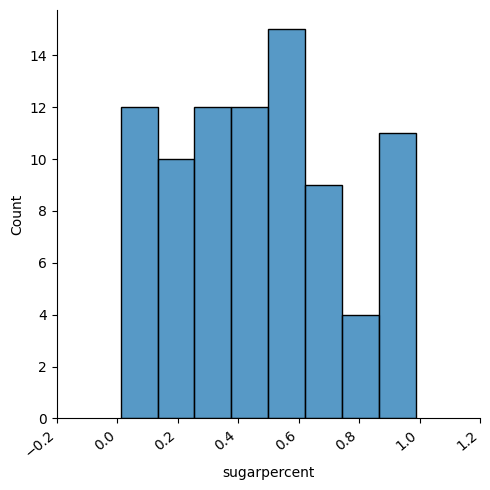

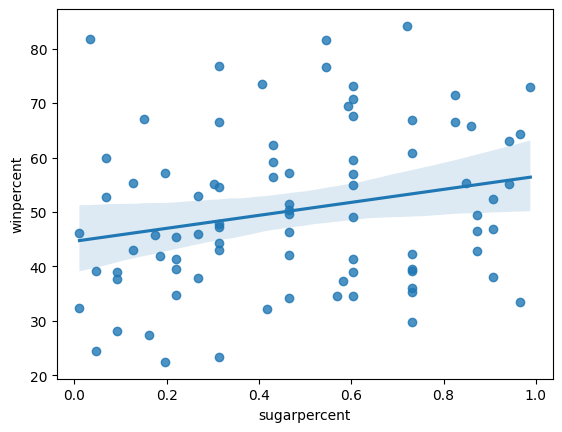

In [4]:
def dist_reg_numerische_variable(df, variable):
     
    dist_numerische_variable(df,variable)
    sns.regplot(x=variable, y='winpercent', data=df)
dist_reg_numerische_variable(df, 'sugarpercent')

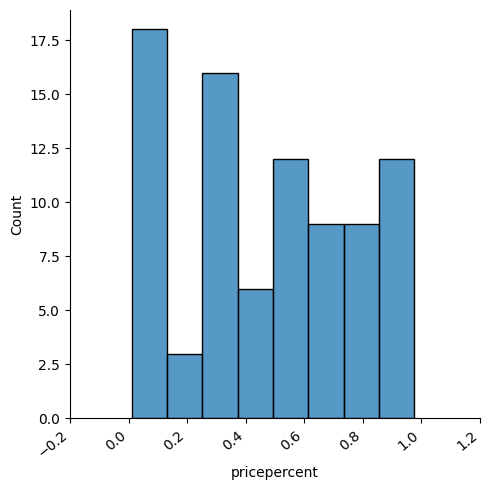

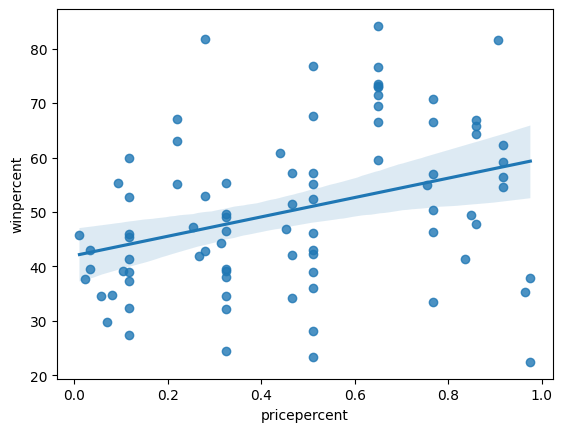

In [5]:
dist_reg_numerische_variable(df, 'pricepercent')

beide sind nicht normalverteilt und weisen eine schwache Korrelation mit dem Ergebnis auf

### Quantil pro Zutaten

In [6]:
zutaten = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer']
       
def quantile_per_variable(df, variable):
    df_var = df[df[variable] == 1]
    return pd.DataFrame({variable: df_var.quantile([.0, .25, .5, .75, 1.0])['winpercent']}) 

df_zutaten = pd.DataFrame()    
    
for i in zutaten:
    df_zutaten = pd.concat([df_zutaten, quantile_per_variable(df, i)], axis=1)

df_zutaten.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer
0.00,34.722000,22.445341,32.230995,23.417824,38.975037,49.524113
0.25,50.347546,39.044187,45.194249,55.123475,51.605572,60.906866
0.50,60.800701,42.969034,60.164976,70.109714,60.800701,66.470680
0.75,70.735641,52.109206,66.657865,73.298218,70.351246,71.870163
1.00,84.180290,67.037628,81.642914,84.180290,76.673782,81.642914


### Zutaten Anzahl & winpercent Quantil analysen

In [7]:
df_anzahl = df.copy()
df_anzahl['zutaten_zahl'] = df[zutaten].sum(axis=1)
df_anzahl['winquantile'] = pd.qcut(df['winpercent'], 4, labels=False)



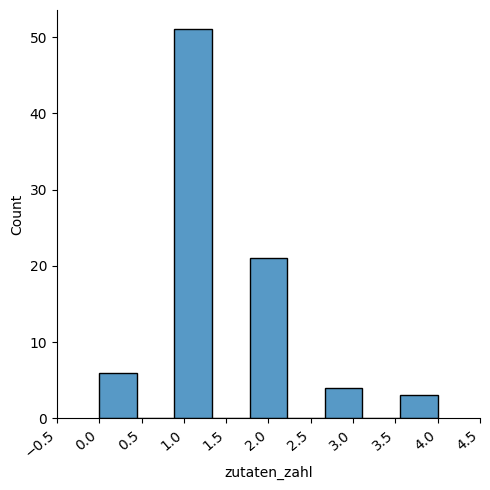

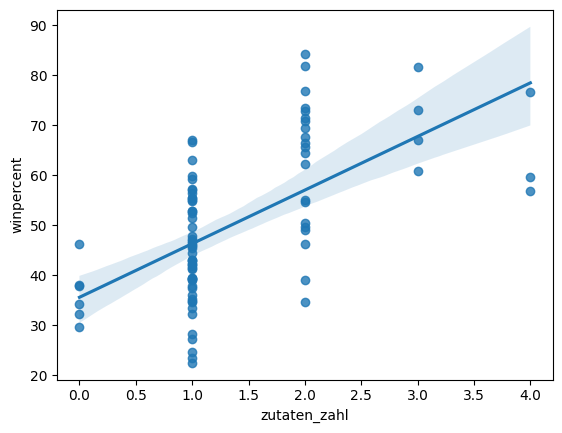

In [8]:
dist_reg_numerische_variable(df_anzahl, 'zutaten_zahl')

Die meisten Produkte haben nicht mehr als zwei Zutaten. Produkte mit drei oder vier Zutaten helfen eher nicht, ein besseres Prozentsatz-Ergebnis zu erzielen.

In [9]:
df_anzahl.groupby('winquantile').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl
winquantile,,,,,,,,,,,,,
0,0.136364,0.500000,0.136364,0.045455,0.045455,0.000000,0.272727,0.045455,0.636364,0.402227,0.376909,33.219809,0.863636
1,0.142857,0.714286,0.047619,0.047619,0.047619,0.000000,0.333333,0.095238,0.571429,0.431286,0.353857,43.728361,1.000000
2,0.571429,0.476190,0.142857,0.190476,0.047619,0.095238,0.095238,0.333333,0.523810,0.478429,0.514476,54.507490,1.523810
3,0.904762,0.095238,0.333333,0.380952,0.190476,0.238095,0.000000,0.523810,0.333333,0.606286,0.634667,70.625537,2.142857


Es sieht so aus, als hätte Beliebt Süßwaren ungefähr zwei Zutaten, enthält Schokolade und Karamell/peanutalmond, ist möglicherweise ein Riegel, sicher kein hartes Bonbon, oft nur einzeln in der Packung, enthält mehr Zucker und ist auch teurer als der Durchschnitt.

### Beliebteste Zutatenkombination


In [10]:
df_anzahl.groupby(zutaten).aggregate({'winpercent': ['mean', 'median', 'count']}).sort_values((      'winpercent',   'mean'), ascending=False)

winpercent  \
                                                                      mean   
chocolate fruity caramel peanutyalmondy nougat crispedricewafer              
1         0      1       0              0      1                 74.307320   
                 0       1              0      0                 69.880879   
                 1       0              1      0                 66.950129   
                         1              1      0                 66.794164   
                 0       0              0      1                 63.761969   
                 1       0              0      0                 61.711233   
                         1              0      1                 59.529251   
                 0       0              1      0                 53.288987   
                                        0      0                 50.344909   
          1      0       0              0      0                 48.982651   
0         0      0       1              1      0                 46.296597   
          1      0       0              0      0                 44.251385   
          0      0       0              0      0                 36.328923   
                 1       0              0      0                 35.857618   
          1      1       0              0      0                 34.517681   
          0      0       1              0      0                 23.417824   

                                                                            \
                                                                    median   
chocolate fruity caramel peanutyalmondy nougat crispedricewafer              
1         0      1       0              0      1                 74.307320   
                 0       1              0      0                 71.465050   
                 1       0              1      0                 66.950129   
                         1              1      0                 66.794164   
                 0       0              0      1                 64.377580   
                 1       0              0      0                 64.353340   
                         1              0      1                 59.529251   
                 0       0              1      0                 53.288987   
                                        0      0                 49.653503   
          1      0       0              0      0                 48.982651   
0         0      0       1              1      0                 46.296597   
          1      0       0              0      0                 42.969034   
          0      0       0              0      0                 35.940647   
                 1       0              0      0                 33.437550   
          1      1       0              0      0                 34.517681   
          0      0       1              0      0                 23.417824   

                                                                       
                                                                count  
chocolate fruity caramel peanutyalmondy nougat crispedricewafer        
1         0      1       0              0      1                    2  
                 0       1              0      0                    9  
                 1       0              1      0                    2  
                         1              1      0                    2  
                 0       0              0      1                    4  
                 1       0              0      0                    3  
                         1              0      1                    1  
                 0       0              1      0                    2  
                                        0      0                   11  
          1      0       0              0      0                    1  
0         0      0       1              1      0                    1  
          1      0       0              0      0                   36  
          0      0

Den ersten Platz belegt „choco+caramel+wafer“, den zweiten Platz „choco+peanut“.

### Produkte untersucht
Hier untersuchen wir die Produkte mit den beliebtesten Zutatenkombinationen direkt.

In [11]:
def df_filter(df, variable, wert):
    df_new = df[df[variable] == wert]
    print(df_new.shape[0])
    return df_new
df_choco = df_filter(df_anzahl, 'chocolate', 1)

37


In [12]:
#kombination 1

df_peanut= df_filter(df_choco, 'peanutyalmondy', 1)

12


In [13]:
df_peanut.head(12)


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
competitorname,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,2,3
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,2,3
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,4,3
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,2,3
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,2,3
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,2,3
Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641,2,3
Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.593,0.651,69.483788,2,3
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,4,2


In [14]:
for i in zutaten:
    if i != 'peanutyalmondy' and i != 'chocolate':
        df_peanut = df_filter(df_peanut, i, 0)
df_peanut.mean()


12
9
9
9


chocolate            1.000000
fruity               0.000000
caramel              0.000000
peanutyalmondy       1.000000
nougat               0.000000
crispedricewafer     0.000000
hard                 0.000000
bar                  0.333333
pluribus             0.333333
sugarpercent         0.549778
pricepercent         0.665111
winpercent          69.880879
zutaten_zahl         2.000000
winquantile          2.777778
dtype: float64

In [15]:
#kombination 2
df_wafer = df_filter(df_anzahl, 'crispedricewafer', 1)
df_wafer.head(10)

7


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
competitorname,,,,,,,,,,,,,,
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,3,3
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,2,3
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3,3
Nestle Crunch,1,0,0,0,0,1,0,1,0,0.313,0.767,66.470680,2,3
Hershey's Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481,2,3
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,4,2
Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,2,2


In [16]:
df_caramel = df_filter(df_wafer, 'caramel', 1)
df_notpeanut = df_filter(df_caramel, 'peanutyalmondy', 0)
df_notpeanut.mean()


3
2


chocolate            1.00000
fruity               0.00000
caramel              1.00000
peanutyalmondy       0.00000
nougat               0.00000
crispedricewafer     1.00000
hard                 0.00000
bar                  1.00000
pluribus             0.00000
sugarpercent         0.63900
pricepercent         0.88300
winpercent          74.30732
zutaten_zahl         3.00000
winquantile          3.00000
dtype: float64


Kombination 1 hat sugarpercent > 50%, pricepercent > 75% 

Kombination 2 hat sugarpercent > 50%, pricepercent > 75% 


### Beliebteste 15 Produkte

In [17]:
df_anzahl.sort_values('winpercent', ascending=False).head(15)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
competitorname,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,2,3
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,2,3
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,3,3
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,2,3
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,4,3
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,2,3
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,3,3
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,2,3
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,2,3


In [18]:
df_Reese = df_anzahl[df_anzahl.index.str.contains('Reese')]
df_Reese.sort_values('winpercent', ascending=False).head(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
competitorname,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,2,3
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,2,3
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,2,3
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,2,3




Hier zeigt Reese ist beliebste Produkt. Eine andere Wahl ist ein Eigenmarkenprodukt, das einfach Reese nachmacht. 

Hier zeigt sich auch ein Problem mit diesen Daten: Reese's Miniatures hat 53 g Zucker pro 100 g, trotzdem hat sie einen sehr niedrigen sugarpercent-Wert, weil sie klein ist. Und der pricepercent  ist auch super niedrig im Vergleich zu anderen Reese-Produkten, weil Halloween Candy eine Einzelpackung ist. In Supermärkten kommt Reese's Miniatures normalerweise in einer 226 g Packung, deshalb gibt es nicht so viel Preisunterschied. 
Außerdem sind Reese's Pieces keine Peanut Butter Cups. Für eine gültige Analyse konzentrieren wir uns hier ausschließlich auf Reese's Peanut Butter Cups.


Reeze hat sugarpercent > 50%, pricepercent = 75% 

Eine zuckerarme Version ermöglicht es uns, Kunden zu erreichen, die mehr auf ihre Gesundheit achten. Da Reeze aber bereits Protein-Riegel und zuckerarme Produkte im Angebot hat, ist diese Variante nicht empfehlenswert. Mit einer Choviva-Version können wir dagegen wertorientierte Kunden gewinnen. (Choviva spricht auch nachhaltige Kunden an, aber das Produkt kann vegan sein und ich gehe davon aus, dass Lidl-Kunden eher wertorientiert sind.)

### Interaktion Regression
Führt die Kombination als Interaktion zur Regression, dann können wir den P-Wert auch überprüfen.


In [19]:
x0 = df.loc[:, ~df.columns.isin(['winpercent'])]
y = df[['winpercent']]
x = sm.add_constant(x0)	
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           9.50e-09
Time:                        00:18:59   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.5340      4.320      7.994      0.000      25.924      43.144
chocolate           19.7481      3.899      5.065      0.000      11.978      27.518
fruity               9.4223      3.763      2.504      0.015       1.923      16.922
caramel              2.2245      3.657      0.608      0.545      -5.065       9.514
peanutyalmondy      10.0707      3.616      2.785      0.007       2.864      17.277
nougat               0.8043      5.716      0.141      0.888     -10.588      12.197
crispedricewafer     8.9190      5.268      1.693      0.095      -1.580      19.418
hard                -6.1653      3.455     -1.784      0.079     -13.051       0.721
bar                  0.4415      5.061      0.087      0.931      -9.645      10.528
pluribus            -0.8545      3.040     -0.281      0.779      -6.913       5.204
sugarpercent         9.0868      4.659      1.950      0.055      -0.200      18.373
pricepercent        -5.9284      5.513     -1.075      0.286     -16.916       5.060
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.000
Skew:                          -0.104   Prob(JB):                        0.606
Kurtosis:                       2.511   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#interaktionen spalten erstellen
df_interaktionen = df.copy()
df_interaktionen["choco_peanut"]  = df["chocolate"] * df["peanutyalmondy"]
df_interaktionen["wafer_chocolate_caramel"] = df["crispedricewafer"] * df["chocolate"] * df["caramel"]
df_interaktionen["wafer_chocolate_caramel_peanut"] = df["crispedricewafer"] * df["chocolate"] * df["caramel"]* df["peanutyalmondy"] 



In [21]:
x1 = df_interaktionen.loc[:, ~df_interaktionen.columns.isin(['winpercent'])]
x = sm.add_constant(x1)	
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7.201
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           5.90e-09
Time:                        00:18:59   Log-Likelihood:                -310.74
No. Observations:                  85   AIC:                             651.5
Df Residuals:                      70   BIC:                             688.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             36.2943      4.328      8.387      0.000      27.663      44.925
chocolate                         15.5529      4.301      3.616      0.001       6.976      24.130
fruity                             7.6739      3.863      1.986      0.051      -0.031      15.379
caramel                            1.8008      4.036      0.446      0.657      -6.250       9.851
peanutyalmondy                    -2.7052      8.763     -0.309      0.758     -20.183      14.772
nougat                             2.6955      5.847      0.461      0.646      -8.967      14.358
crispedricewafer                  11.6037      6.094      1.904      0.061      -0.551      23.758
hard                              -5.9678      3.332     -1.791      0.078     -12.613       0.677
bar                                1.6791      4.958      0.339      0.736      -8.209      11.567
pluribus                           0.0264      2.952      0.009      0.993      -5.861       5.914
sugarpercent                       8.3062      4.512      1.841      0.070      -0.692      17.304
pricepercent                      -6.5157      5.442     -1.197      0.235     -17.369       4.338
choco_peanut                      18.3708      9.458      1.942      0.056      -0.492      37.233
wafer_chocolate_caramel            7.8222      9.826      0.796      0.429     -11.776      27.420
wafer_chocolate_caramel_peanut   -31.6645     13.387     -2.365      0.021     -58.364      -4.965
==============================================================================
Omnibus:                        1.161   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.080
Skew:                          -0.107   Prob(JB):                        0.583
Kurtosis:                       2.491   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Es ist sehr wahrscheinlich, dass ein Hartbonbon die Gewinnprozente um 5-6 Prozentpunkte senkt.
- Die Einzelpackung oder der Riegel haben beide einen sehr hohen P-Wert, das heißt, wir haben eine Chance von 70–99 %, diesen Koeffizienten zu erhalten, obwohl die Nullhypothese (H0: βi = 0) wahr ist.
- Wafer_Chocolate_Caramel (+Caramel + Wafer + Chocolate) wird bevorzugt in vergleichen zu choco_peanut (+ peanut + chocolate), aber leider ist der P-Wert auch zu groß.

Hier unten sind die Analysen, die ich bei ETL überprüft habe. Sie sind trotzdem nicht direkt in das Management Summary gekommen.

### Clustering
Bei Clustering möchte ich checken, wie unterschiedlich sind die Gruppen von Winquntil Gruppe

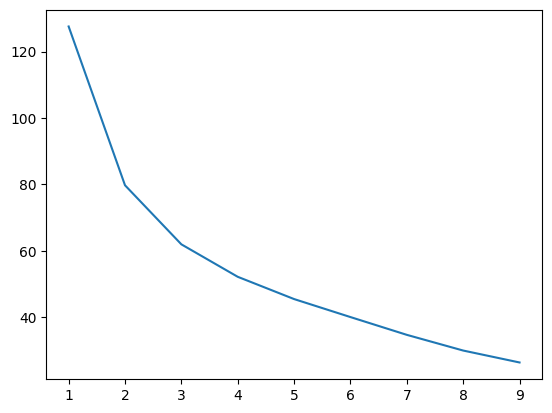

In [22]:

x4 = df.loc[:, ~df.columns.isin(['winpercent', 'sugarpercent', 'pricepercent'])]

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)

In [23]:


# K-Means mit kleiner Clusteranzahl (wegen n=85)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_anzahl['cluster'] = kmeans.fit_predict(x4)

# Cluster-Performance analysieren
cluster_performance = df_anzahl.groupby('cluster').agg(
    {'winpercent': ['mean', 'std', 'count']},

).round(2)
cluster_character = df_anzahl.groupby('cluster').agg(
    ['mean']
).round(2)

print(cluster_performance)
cluster_character

        winpercent             
              mean    std count
cluster                        
0            44.86  11.37    27
1            63.59  12.23    24
2            49.56  15.31    18
3            40.47   7.33    16


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,
0,0.00,0.96,0.00,0.00,0.00,0.00,0.30,0.00,1.00,0.49,0.35,44.86,0.96,1.15
1,0.96,0.00,0.33,0.42,0.29,0.25,0.00,0.88,0.00,0.53,0.70,63.59,2.25,2.42
2,0.72,0.00,0.17,0.22,0.00,0.06,0.00,0.00,0.94,0.48,0.51,49.56,1.17,1.39
3,0.06,0.75,0.19,0.00,0.00,0.00,0.44,0.00,0.00,0.37,0.28,40.47,1.00,0.75


Die beste Leistung erbringt Gruppe 2, Schokolade mit anderen Zutaten: peanutalmond/nougat/caramel/wafer, sanft, Bar, einzeln verpackt, höchst in Zucker und auch am teuersten. Ein ähnliches Ergebnis wie bei der Analyse der Zutatenanzahl.

### OLS

Das ist das Modell meines anderen Projekts. Es hilft mir zu überprüfen, ob die Daten die OLS-Voraussetzungen erfüllen.

In [24]:
class linear_regression():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
            return self.reg.predict(x)
        
    def adjusted_r2(self, x, r2):
        n = x.shape[0]
        p = x.shape[1]
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return adjusted_r2
    
    def intercept(self):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            return self.reg.intercept_


    def linear_regression_on_y(self, x, y):



        feature = x.columns.to_list()

        #Standardisierung überspringen, da die Merkmale entweder auf derselben Skala liegen oder Dummy-Variablen sind.
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg  = LinearRegression()
        self.reg .fit(X_train, y_train)

        # predrict on test set
        y_pred = self.reg.predict(X_test)

        # metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        adj_r2 = self.adjusted_r2(x, r2)

        #coefficients
        reg_summary = pd.DataFrame(data=feature, columns=['Features'])
        reg_summary['Coefficients'] = self.reg .coef_.T    

        #check residuals
        y_hat = self.reg.predict(X_train)
        fig, ax = plt.subplots(1, 2)
        sns.histplot(y_train - y_hat, kde=True, ax=ax[0])
        sns.regplot(x=y_hat, y=(y_train - y_hat), ax=ax[1])

        print(f"coefficients: {reg_summary.sort_values('Coefficients', ascending=False)}\n")
        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"adjusted R^2: {adj_r2:.3f}\n")

  

coefficients:             Features  Coefficients
0          chocolate     22.016573
5   crispedricewafer     16.764181
3     peanutyalmondy     10.849804
1             fruity      9.876768
9       sugarpercent      9.814895
2            caramel      3.602546
8           pluribus      1.284562
7                bar      0.551198
4             nougat      0.158106
6               hard     -4.711751
10      pricepercent     -7.721913

MSE: 218.480

R^2: 0.160

adjusted R^2: 0.033



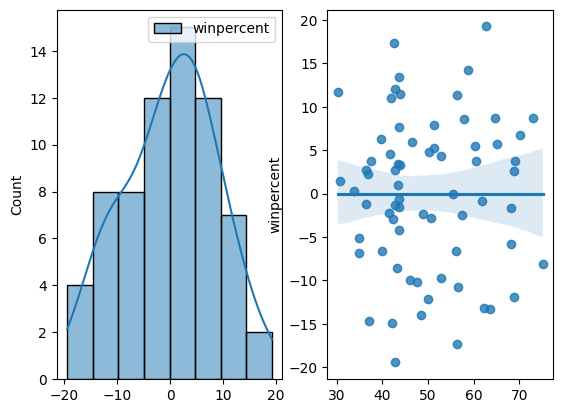

In [25]:
x2 = df.loc[:, ~df.columns.isin(['winpercent'])]
lr_x2 = linear_regression()
lr_x2.linear_regression_on_y(x2, y)

coefficients:        Features  Coefficients
5  zutaten_zahl      9.908303
3  sugarpercent      4.938385
1           bar      3.464590
2      pluribus      0.977836
4  pricepercent     -0.942579
0          hard     -6.848229

MSE: 177.625

R^2: 0.317

adjusted R^2: 0.264



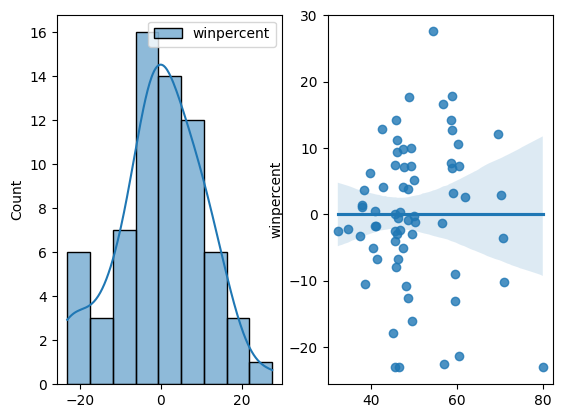

In [26]:
#effekt der zutaten anzahlen, nihmt zutaten aus um Multikollinearität zu vermeiden
x3 = df_anzahl.loc[:, ~df_anzahl.columns.isin(['winpercent', 'winquantile', 'cluster'] + zutaten)]
lr_x3 = linear_regression()
lr_x3.linear_regression_on_y(x3, y)

Das Ergebnis zeigt, dass die lineare Regression für diese Datensätze sehr ungeeignet ist.
Die Residuen sind nicht normalverteilt und die Homoskedastizität ist nicht sicher.
- Es besteht keine Linearität zwischen x und y.
- Endogenität: Wenn wir davon ausgehen, dass keine Messfehler vorhanden sind, dann bestanden.
- Eine Autokorrelation ist nicht vorhanden.
- Multikollinearität wurde noch nicht getestet, ist hier aber auch nicht wichtig.

Außerdem: 
- Die R² ist niedrig und die adjustierten R² sogar noch niedriger, d. h., es gibt zu viele unnötige Merkmale.
- Das SM-Modell hat einen höheren R-Quadrat-Wert, weil wir keinen Train-Test-Split durchführen.
- Wie der Artikel sagt, berücksichtigt OLS nicht, ob alle Zutaten zusammenpassen.

### Random Forest


Das ist auch das Modell meines anderen Projekts. Es handelt sich lediglich um eine schnelle Überprüfung, ob die Daten besser zu einem nichtlinearen Modell passen.






In [27]:
class random_forest():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def random_forest_on_units(self, x, y):



        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg = RandomForestRegressor(n_estimators=100, random_state=42)
        self.reg.fit(X_train, y_train)


        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        summary = pd.DataFrame(data=x.columns, columns=["feature"])
        summary['importance'] = self.reg.feature_importances_


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(summary.sort_values('importance', ascending=False))





In [28]:
rf_x2 = random_forest()
rf_x2.random_forest_on_units(x2, y)

c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 156.941

R^2: 0.397

             feature  importance
0          chocolate    0.483311
9       sugarpercent    0.168401
10      pricepercent    0.151334
5   crispedricewafer    0.044564
1             fruity    0.037743
3     peanutyalmondy    0.028016
8           pluribus    0.024711
2            caramel    0.021937
6               hard    0.017505
7                bar    0.012439
4             nougat    0.010039


non-linearität hat ein bessere R^2 als Linear model, troztdem unterschied ist nicht so groß

### Lasso


Optimales Alpha: 0.2642

=== FEATURE SELECTION ERGEBNISSE ===

✓ AUSGEWÄHLTE FEATURES (7):
  chocolate           :  14.1394 (+)
  choco_peanut        :   9.8454 (+)
  crispedricewafer    :   4.9279 (+)
  sugarpercent        :   4.6611 (+)
  hard                :  -3.0778 (-)
  fruity              :   2.8401 (+)
  bar                 :   0.8910 (+)

✗ ELIMINIERTE FEATURES (7):
  nougat
  caramel
  peanutyalmondy
  pluribus
  pricepercent
  wafer_chocolate_caramel
  wafer_chocolate_caramel_peanut


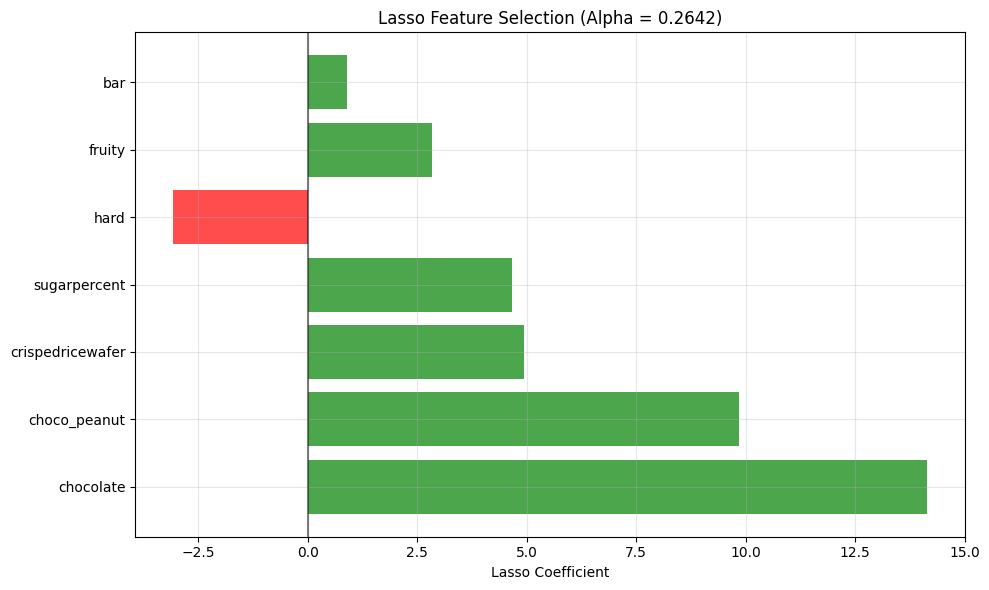

In [29]:
# Features und Zielvariable definieren
X = x1.reset_index().drop(['competitorname'], axis=1)
y = df['winpercent']


# 1. LASSO mit Cross-Validation für optimales Alpha
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=2000)
lasso_cv.fit(X, y)

optimal_alpha = lasso_cv.alpha_
print(f"\nOptimales Alpha: {optimal_alpha:.4f}")

# 2. Lasso mit optimalem Alpha trainieren
lasso = Lasso(alpha=optimal_alpha, max_iter=2000)
lasso.fit(X, y)

# 3. Feature Selection - Welche Features behält Lasso?
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_,
    'Abs_Coefficient': np.abs(lasso.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n=== FEATURE SELECTION ERGEBNISSE ===")

# Ausgewählte Features (Koeffizient != 0)
selected_features = feature_importance[feature_importance['Abs_Coefficient'] > 0]
eliminated_features = feature_importance[feature_importance['Abs_Coefficient'] == 0]

print(f"\n✓ AUSGEWÄHLTE FEATURES ({len(selected_features)}):")
for _, row in selected_features.iterrows():
    direction = "+" if row['Coefficient'] > 0 else "-"
    print(f"  {row['Feature']:<20}: {row['Coefficient']:>8.4f} ({direction})")

print(f"\n✗ ELIMINIERTE FEATURES ({len(eliminated_features)}):")
for _, row in eliminated_features.iterrows():
    print(f"  {row['Feature']}")

# 4. Visualisierung der Feature-Koeffizienten
plt.figure(figsize=(10, 6))
colors = ['green' if coef > 0 else 'red' for coef in selected_features['Coefficient']]
plt.barh(range(len(selected_features)), selected_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(selected_features)), selected_features['Feature'])
plt.xlabel('Lasso Coefficient')
plt.title(f'Lasso Feature Selection (Alpha = {optimal_alpha:.4f})')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()
